In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn import metrics

In [26]:
df_cct = pd.read_parquet("/home/onyxia/work/df_cct.parquet")

### Correlation map

/tmp/ipykernel_3474/1342149493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cct.corr())


<Axes: >

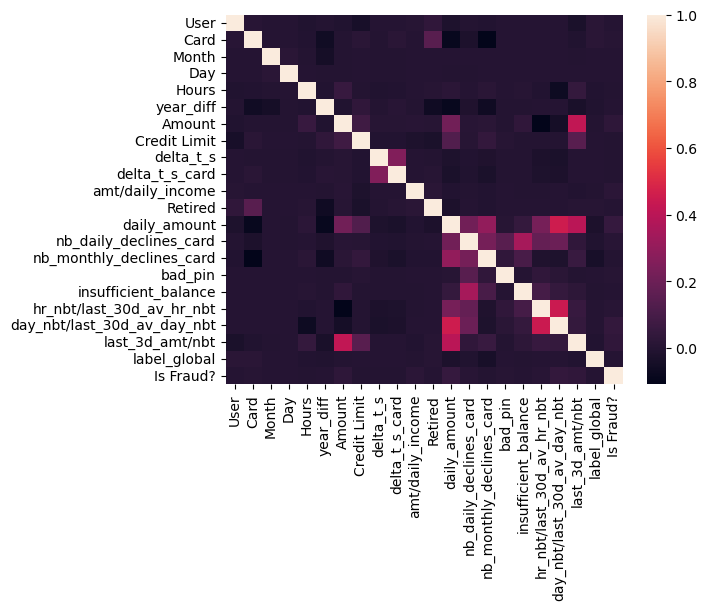

In [3]:
sns.heatmap(df_cct.corr())

In [47]:
df_cct.columns

Index(['User', 'Card', 'Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Use Chip', 'Card Brand', 'Card Type', 'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?'],
      dtype='object')

### Preprocessing

In [48]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df_cct.loc[:,~df_cct.columns.isin(["User","Card","label_global","Retired", "bad_pin", "insufficient_balance","Is Fraud?"])].select_dtypes(include=numerics).columns.to_list()
cat = df_cct.select_dtypes(include=['object']).columns.to_list()


In [49]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df = pd.DataFrame()
for i in range(2000):
    user_i = df_cct[df_cct["User"] == i]
    user_i[num] = scaler.fit_transform(user_i[num])
    df = pd.concat([df,user_i], axis=0)


/tmp/ipykernel_3474/3353035098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_i[num] = scaler.fit_transform(user_i[num])
/tmp/ipykernel_3474/3353035098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_i[num] = scaler.fit_transform(user_i[num])
/tmp/ipykernel_3474/3353035098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [51]:
#df.to_parquet("/home/onyxia/work/df_cct_stand2.parquet")

In [55]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [56]:
# Pour "Card Brand":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["Card Brand"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [57]:
# Pour "Card Type"":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["Card Type"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [59]:
df.columns

Index(['User', 'Card', 'Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Use Chip', 'Card Brand', 'Card Type', 'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'label_global',
       'Is Fraud?', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction', 'Amex', 'Discover', 'Mastercard', 'Visa', 'Credit',
       'Debit', 'Debit (Prepaid)'],
      dtype='object')

In [94]:
# selecting features
# dropped card, nb_weekly_declines, day_of_week
features = ['Month', 'Day', 'Hours', 'year_diff', 'Amount',
       'Credit Limit', 'delta_t_s',
       'delta_t_s_card', 'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Chip Transaction', 'Online Transaction',
       'Swipe Transaction', 'Amex', 'Discover', 'Mastercard', 'Visa', 'Credit',
       'Debit', 'Debit (Prepaid)', "label_global","Is Fraud?"]
df_selec = df[features]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)


In [158]:
X_train

,Month,Day,Hours,year_diff,Amount,Credit Limit,delta_t_s,delta_t_s_card,amt/daily_income,Retired,...,Online Transaction,Swipe Transaction,Amex,Discover,Mastercard,Visa,Credit,Debit,Debit (Prepaid),label_global
17399150,-0.666667,-0.266667,-0.538462,1.000000,0.072306,0.000000,0.530035,0.422145,0.072306,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
8942682,0.666667,0.333333,0.000000,-0.200000,-0.248472,6392.000000,2.293286,0.924863,-0.248472,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
23274967,0.833333,0.866667,1.000000,0.666667,-0.035970,0.000000,0.079670,-0.175591,-0.035970,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
14614184,0.000000,0.733333,-0.250000,0.000000,-0.139247,-14002.000000,-0.335135,-0.533141,-0.139247,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
16222105,0.166667,0.533333,-0.500000,-0.666667,-0.595690,-0.992716,0.045455,0.168511,-0.595690,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18722390,-0.666667,0.133333,0.333333,1.142857,-0.261644,0.000000,0.277778,0.506143,-0.261644,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
9720781,-0.333333,-0.266667,-0.200000,-0.400000,0.090748,0.000000,-0.167458,-0.169587,0.090748,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
11570060,0.833333,0.733333,-0.545455,0.000000,-0.133619,0.000000,-0.451745,-0.451745,-0.133619,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5973904,0.000000,-0.333333,1.571429,0.400000,1.091703,-0.486620,1.169742,1.257549,1.091703,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [142]:
import random
random.seed(42)
df_train = pd.DataFrame()
for i in range(-1,7,1):
    cluster_i_list = df_selec[df_selec["label_global"] == i].index.tolist()
    index = random.sample(cluster_i_list, int(len(df_selec[df_selec["label_global"] == i])*0.4))
    df_rs = df_selec.loc[index]
    df_train = pd.concat([df_train, df_rs], axis = 0)

In [143]:
#train set
X_train = df_train.drop(["label_global","Is Fraud?"], axis = 1).reset_index(drop=True)
y_train = df_train["Is Fraud?"].reset_index(drop=True)

In [149]:
#test set 
df_rest = df_selec[~df_selec.index.isin(df_train.index)]
df_rest_fraud = df_rest[df_rest["Is Fraud?"] == 1]
df_rest_no_fraud = df_rest[df_rest["Is Fraud?"] == 0]
df_test = pd.concat([df_rest_fraud, df_rest_no_fraud.sample(480000, random_state = 42)], axis = 0)
df_test.sort_index(ascending=True, inplace=True)

In [151]:
X_test = df_test.drop(["label_global", "Is Fraud?"], axis = 1)
y_test = df_test["Is Fraud?"]

### Modeling

In [152]:
# Build and train model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
# Apply model to validation data
y_pred = decision_tree.predict(X_test)

### Evaluating

In [154]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    480000
           1       0.83      0.16      0.26     17913

    accuracy                           0.97    497913
   macro avg       0.90      0.58      0.62    497913
weighted avg       0.96      0.97      0.96    497913



In [155]:
# plot confusion matrix function
import itertools

def plot_confusion_matrix(cm,normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        classes=['Non-Fraud','Fraud']
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            # print("Normalized confusion matrix")
        else:
            1  # print('Confusion matrix, without normalization')

        # print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        return ()

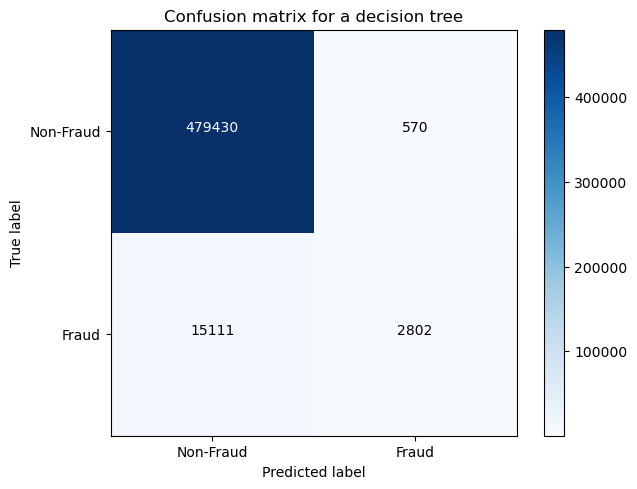

In [156]:

cnf_matrix_dtree = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix_dtree, title='Confusion matrix for a decision tree')
plt.show()

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
cost = fp*15 + fn*45 - tp*45
cost

424275